# Kaggle EDA Start

## Explore

In [86]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
## load data
inputdir='./'
outputdir='./'

In [88]:
df_train = pd.read_csv(inputdir+'train.csv')
df_test = pd.read_csv(inputdir+'test.csv')

In [89]:
## data explore
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [92]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
# train, test 데이터가 survived를 제외하고 동일함. 합쳐서 전처리 작업을 할 수 도 있다.
# df_all = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0)
# or
df_all = pd.concat([df_train.drop(columns='Survived'), df_test], axis=0)
# passengerid는 의미없으므로 제거
df_all.drop(columns='PassengerId', inplace=True)

In [94]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
# 컬럼 타입별로 구분. 숫자와 숫자 아닌 것. 위에 info() 참고.
df_num = df_all.select_dtypes(include=['int64', 'float64'])
df_str = df_all.select_dtypes(include=['object'])

In [96]:
df_num.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [97]:
# 스트링 컬럼으로 보면, 클래스 개수(unique참조), 전체 개수 파악(미싱제외)
df_str.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [98]:
# 개수 분포, 그래프
# df_train['Survived'].value_counts().plot.bar()

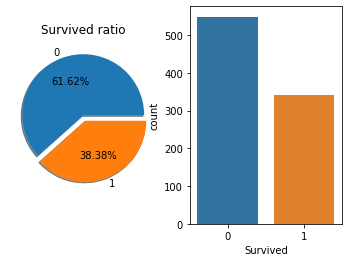

In [99]:
# 생존자 비율
f, ax = plt.subplots(1,2)

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived ratio')
ax[0].set_ylabel('')

# Survived 컬럼 카운트
sns.countplot('Survived', data=df_train, ax=ax[1])

In [100]:
# 성별과 생존 관계
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

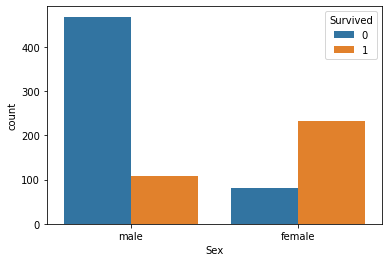

In [101]:
sns.countplot('Sex', hue='Survived', data=df_train)

In [102]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [103]:
## 피클래스와 생존 관계
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


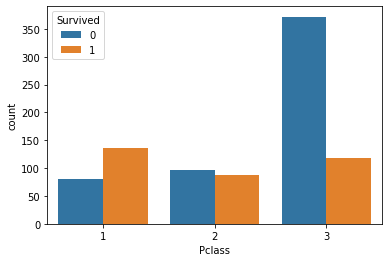

In [104]:
sns.countplot('Pclass', hue='Survived', data=df_train)

In [105]:
## 성별과 피클래스에 따른 생존
pd.crosstab([df_train.Sex, df_train.Pclass], df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

In [106]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

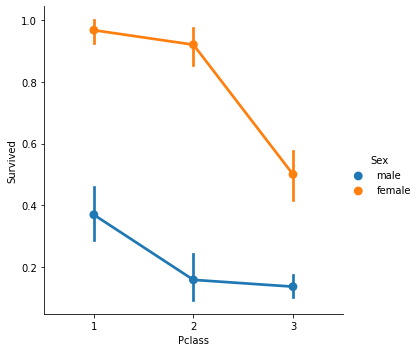

In [107]:
## 비율 꺽은선 그래프
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

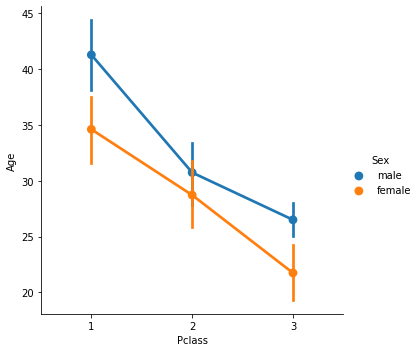

In [108]:
sns.factorplot('Pclass', 'Age', hue='Sex', data=df_train)

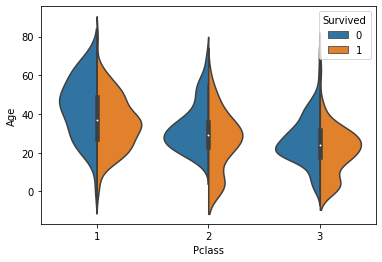

In [109]:
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, split=True)

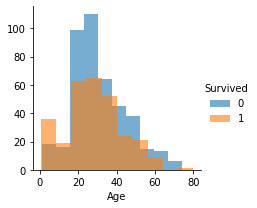

In [118]:
# 연령대별 생존률
grid = sns.FacetGrid(df_train, hue='Survived')
grid.map(plt.hist, 'Age', alpha=.6)
grid.add_legend()

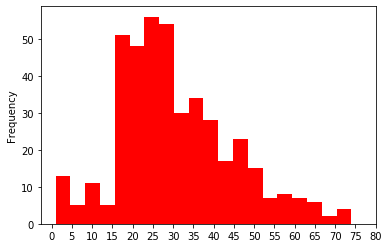

In [110]:
df_train[ df_train['Survived']==0 ].Age.plot.hist(bins=20, color='red')
xlist = list(range(0, 85, 5))
plt.xticks(xlist)
plt.show()

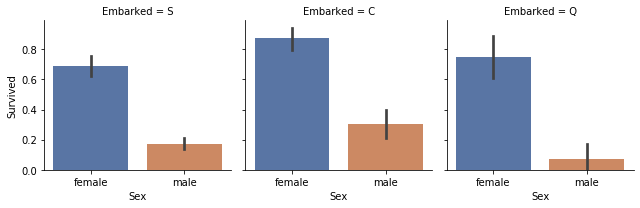

In [120]:
grid = sns.FacetGrid(df_train, col='Embarked', size = 3)
grid.map(sns.barplot, 'Sex', 'Survived', palette='deep', order=['female','male']);

In [124]:
df_num.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,-0.558629,0.178740,0.160238,0.221539,1.000000


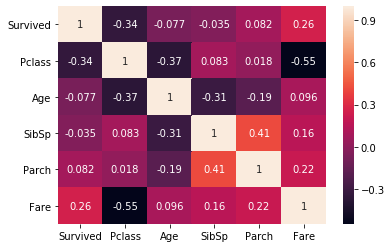

In [111]:
sns.heatmap( df_train.drop('PassengerId', axis=1).corr(), annot=True)

---
## Preprocessing